# CH2

## 2.1

### 2-1. 케라스에서 MNIST 데이터 불러오기

In [56]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 2-2. 신경망 구조

train

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

test

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 2-3. 신경망 만들기

In [60]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### 2-4. 모델 컴파일

In [10]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

훈련 시작 전 데이터를 모델에 맞는 크기로 바꾸고, 모든 값을 0과 1 사이로 스케일 조정

In [11]:
# uint8: [0,255] (60000, 28, 28) -> float32: [0,1] (60000, 28*28) 
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

### 2-5. 모델 훈련하기

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 0.2559 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1044 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0679 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0372 - accuracy: 0.9887


### 2-6. 모델을 사용하여 예측 만들기

In [13]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 220ms/step


In [14]:
# 인덱스 i에 있는 숫자: 숫자 이미지 test_digits[0]이 클래스 i에 속할 확률에 해당 
predictions[0]

array([1.0881753e-09, 1.3704588e-11, 1.7448589e-06, 5.4633160e-06,
       1.4420689e-12, 5.1639204e-09, 1.3965958e-15, 9.9999225e-01,
       1.6604670e-08, 4.6999068e-07], dtype=float32)

In [15]:
predictions[0].argmax()

7

In [16]:
predictions[0][7]

0.99999225

In [17]:
# 실제값과 추정값 일치! 
test_labels[0]

7

### 2-7. 새로운 데이터에서 모델 평가하기

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0708 - accuracy: 0.9791
테스트 정확도: 0.9790999889373779


## 2.2

In [19]:
import numpy as np

스칼라

In [20]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

행렬

In [23]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [24]:
x.ndim

2

랭크-3 텐서

In [25]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 8, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 8, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5,  8,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5,  8,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [26]:
x.ndim

3

MNIST 데이터셋

In [27]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.ndim

3

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
train_images.dtype

dtype('uint8')

### 2.8 다섯번째 이미지 출력하기

In [31]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

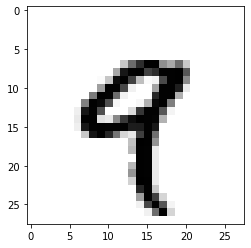

In [33]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

In [34]:
train_labels[4]

9

슬라이싱

In [35]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [41]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [42]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

배치

In [43]:
batch = train_images[:128]

In [44]:
batch = train_images[128:256]

In [45]:
n = 3
batch = train_images[128*n:128*(n+1)]

## 2.3

**단순 원소별 연산 vs 원소별 연산**

In [2]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [4]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [12]:
import numpy as np
import time

In [13]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))

In [14]:
z = x + y # 원소별덧셈
z = np.maximum(z, 0.)  # 원소별 relu

In [15]:
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [17]:
t0 = time.time()
for _i in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 5.36 s


**브로드캐스팅**

In [18]:
X = np.random.random((32, 10))
y = np.random.random((10,))

In [19]:
# y에 비어있는 첫번째 축을 추가하여 크기를 (1,10)으로
y = np.expand_dims(y, axis=0)

In [20]:
# y를 이 축에 32번 반복 -> Y 크기 ((32,10))로 X와 같아짐 
Y = np.concatenate([y]*32, axis=0)

In [22]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(x.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = y[j]
    return x

In [23]:
# 크기가 다른 두 텐서임에도 불구하고 브로드캐스팅으로 원소별 maximum 계산 가능
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

**텐서 곱셈**

In [27]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [28]:
# 두 벡터
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] + y[i]
    return z

In [30]:
# 행렬과 벡터 
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] + y[j]

In [31]:
# 두 행렬: 앞서 만든 두 벡터간 점곱 활용
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
# 두 행렬
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0] # 두 행렬 점곱할 때 첫번째 행렬의 열 개수 = 두번째 행렬의 행 개수
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row__x, column_y)
    return z

**텐서 크기 변환**

In [32]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

In [33]:
x.shape

(3, 2)

In [35]:
x= x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [37]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

전치

In [41]:
x = np.zeros((300, 20))

In [42]:
x = np.transpose(x)
x.shape

(20, 300)

## 2.4

모멘텀

In [44]:
# past_velocity = 0.
# momentum = 0.1
# while loss > 0.01:
#     w, loss. gradient = get_current_parameters()
#     velocity = momentum + past_velocity - learning_rate * gradient
#     w = w + momentum * velocity - learning_rate * gradient
#     past_velocity = velocity
#     update_parameter(w)

연쇄 법칙

In [45]:
def fghj(x):
    x1 = j(x)
    x2 = h(x2)
    x3 = g(x2)
    y = f(x3)
    return y

텐서플로의 그래디언트 테이프

In [46]:
import tensorflow as tf

In [50]:
# 스칼라
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)  # x에 대한 출력 y의 그래디언트

In [51]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [52]:
# 다차원 텐서
x = tf.Variable(tf.zeros((2, 3)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)  # ㅌ=[[0, 0], [0, 0]]일 때 y의 곡률

In [53]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [54]:
# 변수 리스트의 그래디언트 계산
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b  # matmul: 텐서플로의 점곱함수
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.1268277, 1.1268277],
        [0.6688367, 0.6688367]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## 2.5

입력데이터

In [58]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
trian_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

모델

In [61]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(18, activation="softmax")
])

모델 컴파일

In [62]:
model.compile(optimizer="rmsprop",  # 경사하강법을 적용하는 구체적인 방식이 정해짐
              loss = "sparse_categorical_crossentropy", 
              metrics=["accuracy"])

훈련 반복

In [63]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 13ms/step - loss: 4.9936 - accuracy: 0.9010
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.6922 - accuracy: 0.9542
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.4684 - accuracy: 0.9654
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3870 - accuracy: 0.9713
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3025 - accuracy: 0.9772


### 텐서플로를 사용하여 밑바닥부터 다시 구현하기

In [65]:
import tensorflow as tf

단순한 Dense 클래스

In [106]:
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size, )
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs):  # 정방향 패스 수행
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):  # 층의 가중치 추출
        return(self.W, self.b)

단순한 Sequential 클래스

In [107]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

NaiveDense와 NaiveSequential을 이용한 케라스와 유사한 모델

In [109]:
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size = 18, activation=tf.nn.softmax)
])

assert len(model.weights) == 4

배치 제너레이터

In [110]:
import math

In [111]:
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

그래디언트 계산

In [112]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

가중치 업데이트

In [113]:
# 수동으로 업데이트
learning_rate = 1e-3

def update_weights(gradients, wieghts):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [114]:
# Optimizer 사용
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

전체 훈련 루프

In [115]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실 : {loss:.2f}")

In [116]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images= test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

epoch 0
0번째 배치 손실 : 5.16
100번째 배치 손실 : 2.25
200번째 배치 손실 : 2.20
300번째 배치 손실 : 2.11
400번째 배치 손실 : 2.21
epoch 1
0번째 배치 손실 : 1.93
100번째 배치 손실 : 1.89
200번째 배치 손실 : 1.83
300번째 배치 손실 : 1.72
400번째 배치 손실 : 1.83
epoch 2
0번째 배치 손실 : 1.60
100번째 배치 손실 : 1.59
200번째 배치 손실 : 1.51
300번째 배치 손실 : 1.43
400번째 배치 손실 : 1.51
epoch 3
0번째 배치 손실 : 1.34
100번째 배치 손실 : 1.35
200번째 배치 손실 : 1.25
300번째 배치 손실 : 1.21
400번째 배치 손실 : 1.28
epoch 4
0번째 배치 손실 : 1.14
100번째 배치 손실 : 1.17
200번째 배치 손실 : 1.05
300번째 배치 손실 : 1.05
400번째 배치 손실 : 1.11
epoch 5
0번째 배치 손실 : 0.99
100번째 배치 손실 : 1.03
200번째 배치 손실 : 0.91
300번째 배치 손실 : 0.92
400번째 배치 손실 : 0.99
epoch 6
0번째 배치 손실 : 0.88
100번째 배치 손실 : 0.93
200번째 배치 손실 : 0.81
300번째 배치 손실 : 0.83
400번째 배치 손실 : 0.90
epoch 7
0번째 배치 손실 : 0.79
100번째 배치 손실 : 0.84
200번째 배치 손실 : 0.73
300번째 배치 손실 : 0.76
400번째 배치 손실 : 0.83
epoch 8
0번째 배치 손실 : 0.73
100번째 배치 손실 : 0.78
200번째 배치 손실 : 0.67
300번째 배치 손실 : 0.71
400번째 배치 손실 : 0.78
epoch 9
0번째 배치 손실 : 0.68
100번째 배치 손실 : 0.72
200번째 배치 손실 : 0.62
300번째 배치 손실 : 0.66
400번째 배치 

모델 평가하기

In [118]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82
